# people_知識擷取
* people文章很多，主題複巷雜。如何萃取出我們要的知訊是個很大的挑戰。
* 例如: 政治鬥爭，腥風血雨，我們可以找出受害者嗎? 反革命鬥爭，我們可以找出他們究竟在反什麼嗎? 中共在搞鬥爭也在搞建設，我們可以找出他們在不同時期出台的政策嗎?
* 本次的學習包，我們嘗試用 regular expression 萃取出們要的資訊。
* 尚在嘗試，還在研究中。


# 只取含定特定關鍵詞（台灣）的前後十個字
* 耗時頗多，要跑整個晚上

In [ ]:
import pandas as pd
path="D:/my python/people/" 
def read_doc_select_pkl(unit, field, path,title):
    fname=path+"working/"+unit+"_"+field+"_"+title+".pkl"
    df=pd.read_pickle(fname)
    return df

In [ ]:
path="D:/my python/people/" 
kw=["台湾"]
title="台灣"
field ="token"   #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=read_doc_select_pkl(unit, field, path,title)
################################
# 耗時甚長，挑一個年度測試
################################
df1=df[df.year==2012]
df1=df.copy()

In [ ]:
import pandas as pd
import re

# 製作 regular expression 指令
###################################
num=10    #前後十個字
###################################
s_before=""
s_after=""
for n in range(num+3): 
    if n==0:
        s_before=s_before+"("
        s_after=")"+s_after 
    elif n==num+2:      
        s_before=s_before+kw
        s_after=kw+s_after
    elif n==num+1:
        s_before=s_before+")"
        s_after="("+s_after
    else:    
        s_before=s_before+".?"
        s_after=".?"+s_after      
print (s_before)
print (s_after)

# 亦可直接定義
# s_after =r'台湾(.?.?.?.?.?.?.?.?.?)'
# s_before =r'(.?.?.?..?.?.?.?.?.?)台湾'
# 擷取字串
df1['before']=df1.token.str.extract(s_before)
df1['middle']=['台湾']*len(df1)
df1['after']=df1.token.str.extract(s_after)
df1[["year","filename",'before','middle','after']]


,year,filename,before,middle,after
0,1946,人民日報_19460522_1_4323,谈话 又 透露 了,台湾,工业 在 官僚资
1,1946,人民日報_19460612_1_2173,,台湾,地区 的 日军 ，
2,1946,人民日報_19460612_1_2173,已有 数百个,台湾,军官 与 士兵
3,1946,人民日報_19460719_1_1292,,台湾,旅 沪 同乡会
4,1946,人民日報_19460719_1_1292,,台湾,人 喜欢 美国 统
...,...,...,...,...,...
148101,2012,人民日報_20120103_2_20570,， 最 符合 包括,台湾,同胞 在内 的 全
148102,2012,人民日報_20120102_1_20594,门特别行政区 同胞,台湾,同胞 和 海外侨胞
148103,2012,人民日報_20120102_2_20598,门特别行政区 同胞,台湾,同胞 和 海外侨胞
148104,2012,人民日報_20120102_4_20618,” 今天 在 位于,台湾,南投县 的 中台



# 由前、後綴詞，選取文字串

In [ ]:
##########################
num=10
#########################
kw_b="台湾"
kw_a="领导人"
string=""
for n in range(num+3): 
    if n==0:
        string=string+kw_b+"("
    elif n==num+2:      
        string=string+kw_a
    elif n==num+1:
        string=string+")"
    else:    
        string=string+".?"
print (string)

台湾(.?.?.?.?.?.?.?.?.?.?)领导人


In [ ]:
# string=r'台湾(.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?.?)领导人'
df1['pre']=["台湾"]*len(df1)
df1['words']=df1.token.str.extract(string)
df1['pos']=["领导人"]*len(df1)
# 刪除 nan 
df1 = df1.dropna()
df1[['year',"pre","words","pos"]]

,year,pre,words,pos
27404,1958,台湾,当局,领导人
49494,1979,台湾,的 体育,领导人
52352,1981,台湾,当局 的 高级,领导人
54666,1981,台湾,,领导人
54839,1981,台湾,的 某些,领导人
...,...,...,...,...
147973,2012,台湾,当局 正副,领导人
147983,2012,台湾,地区,领导人
147989,2012,台湾,地区,领导人
147990,2012,台湾,地区,领导人


# 提及[判刑]的句子

In [ ]:
######################################
path="D:/my python/people/" 
title="死刑"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=read_doc_select(unit, field, path,title)

NameError: name 'read_doc_select' is not defined

In [ ]:
判刑=["死亡","死刑", "处死","自缢","处决","判刑"]
death=[]
filename=[]
for n in range(len(df)):
    token=df.para[n].split()
    if len(set(判刑).intersection(token))>0:
        year.append(df.year[n])
        death.append(df.para[n])
        filename.append(df.filename[n])
data=list(zip(year, death,filename))    
df_death=pd.DataFrame(data,columns=["year","death","filename"])

In [ ]:
df_death.sample(10)

,year,death,filename
6594,1970,“ 为了 祖国 的 独立 ， 为了 对 正在 反对 美帝国主义 的 各个 民族 承担义务 ...,人民日報_19700904_4_399912
11431,2005,在 苏丹政府 1 日 上午 证实 第一副 总统 兼 南方 政府主席 加朗 因 飞机 失事 ...,人民日報_20050802_3_15157
10583,1997,” 庐山 发展 旅游 经济 ， 不 迎合 某些 人 的 低级趣味 ， 不 以 牺牲 精神文...,人民日報_19980714_4_1090285
2948,1957,总之 ， 右派分子 叫喊 的 “ 个性 解放 ” ， 就是 要为 旧 世界 、 为 死亡 ...,人民日報_19570808_7_173646
2700,1955,如 对 牲畜 使用不当 ， 管理 饲养 不善 和 反革命 破坏分子 的 抢害 等 ， 致使...,人民日報_19560630_8_143020
824,1949,他们 企图 用 基本上 消灭 个别 资本主义 国家 的 经济危机 来 克服 资本主义 总危...,人民日報_19491213_5_27012
4267,1961,今年 是 烈士 牺牲 五十五 周年纪念 ， 绍兴 “ 和畅 堂 ” 作为 旧 民主主义 革...,人民日報_19620304_5_286568
678,1949,因为 它 已 不是 “ 改朝换代 ” 了 ， 它 是 中国 人民 经过 近百年来 的 牺牲...,人民日報_19490929_8_41579
5464,1965,越南 南方 解放 通讯社 十二日 发表声明 ， 重申 南越 人民 不惜 任何 牺牲 ， 一...,人民日報_19660219_4_352886
5775,1966,世界 革命 人民 已经 为 帝国主义 、 现代 修正主义 和 各国 反动派 挖好 了 死亡...,人民日報_19670102_4_363534


In [ ]:
print (title)
print ("*************************")
import random
for m in range(10):
    n=random.randint(1,len(df_death))-1
    print (df_death.filename[n])
    print (df_death.death[n])
    print ("-------------------------------")

反革命
*************************
人民日報_20061129_3_3452
本报 驻 俄罗斯 记者 于宏建 俄罗斯 前 特工 利特 维年科 在 １ １ 月 １ 日 的 两次 约会 后 突然 病倒 ， 并 于 ２ ３ 日 在 伦敦 一家 医院 死亡 
-------------------------------
人民日報_19860708_6_731851
 印 旁遮普邦 四百人 死 于 骚乱 今年以来 ， 在 印度 锡克教 徒 中 的 激进分子 闹事 的 旁遮普邦 ， 已有 四百多 人 在 骚乱 中 死亡 
-------------------------------
人民日報_19491219_5_30119
 ” 这些 话 发表 的 时机 ， 是 正当 苏维埃 人民 不但 保卫 自己 祖国 ， 而且 保卫 全世界 文明 以 免除 纳粹 野蛮 奴役 ， 对 强大 的 希特勒 军事 机构 进行 一次 又 一次 的 大规模 斗争 ， 并且 为了 胜利 而 忍受 空前 牺牲 的 时候 
-------------------------------
人民日報_19500706_4_54615
 苏联 各报 均 于 二日 刊载 专文 ， 纪念 无产阶级 国际主义 的 杰出 革命领袖 季米特洛夫 逝世 一周年 
-------------------------------
人民日報_20100609_18_25411
 我 认为 应当 取消 贪污贿赂 犯罪 以及 金融诈骗 犯罪 的 死刑 
-------------------------------
人民日報_19560920_8_150456
 对于 一切 坦白交代 、 投案自首 的 反革命 分子 ， 即令 是 反革命 分子 中 的 骨干分子 ， 一律 给予 从宽 处置 ， 罪该处死 的 可以 不判 死刑 ， 立 有 功劳 的 ， 可以 减刑 或者 折罪 ， 立 了 大功 的 ， 给予 奖励 
-------------------------------
人民日報_19981206_2_1103033
新华社 广州 12 月 5 日电 （ 记者 王勇 ） 广东省高级人民法院 今天 对 张子强 等 36 人 非法 买卖 、 运输 爆炸物 ， 非法 买卖 、 运输 枪支 、 弹药 ， 私藏

## 句式: 受誰的迫害
* ...因...迫害...于...年...逝世|去世...终年...岁
* ...受...迫害...于...年...逝世|去世...终年...岁
* ...被...迫害...于...年...逝世|去世...终年...岁
* ...在...迫害...于...年...逝世|去世...终年...岁

In [ ]:
import re
title="迫害"
# \w{2,5} 表示，2 到 5 個任意字元，含空白，文本有斷詞以空白隔開
pattern=[' (.{2,10}) ， 因 受(.{2,40})迫害',
         ' (.{2,10}) ， 因 (.{2,40})迫害',
         ' (.{2,10}) ， 受 (.{2,40})迫害',
         ' (.{2,10}) ， 被 (.{2,40})迫害',
         ' (.{2,10}) ， 在 (.{2,40})迫害']
sub=[]
obj=[]
for n in range(len(df)):
    st=df.para[n] # 去除斷詞
    d=df.filename[n]
    for pa in range(len(pattern)):
        p=0
        string="re.compile(r'"+pattern[pa]+"')"
        patt=eval(string)
        result=patt.findall(st)
        # 如果有找到
        if len(result)>0:
            for r in range(len(result)):
                sub.append(result[r][0])
                obj.append(result[r][1])
                print (sub[-1],"-----",obj[-1])                   
    if n%10000==0:
        print (n,"/",len(df),"done")

0 / 1817625 done
本市 的 市民 ----- 敌伪 八年 血腥 剥削 下 ， 备受 摧残 
— — 新华社 ----- 这 一次 反动 的 ‘ 七七 事件 ’ 中 ， 遭受 到 最大 的 
10000 / 1817625 done
青年 失业 与 失学 ----- 特务 
20000 / 1817625 done
二百 十六 户 人家 ----- 不了 歉年 和 伪 三 支队 
二百 十六 户 人家 ----- 受不了 歉年 和 伪 三 支队 
30000 / 1817625 done
武装 干涉 与 支持 ----- 希腊 建立 起 血腥 的 法西斯 统治 ， 残酷 地 
40000 / 1817625 done
议员 诗人 尼鲁达 ----- 指责 反动 政府 服役 于 美国 垄断资本 家 利益 而 遭受 
50000 / 1817625 done
工人 福利 工作 ----- 拒绝接受 蒋匪 特务 的 操纵 ， 屡遭 蒋匪 
各 城市居民 ----- 久 受 蒋匪 
一起 ， 义愤填膺 ----- 着 
暑假 学生 的 分散 ----- 各地 滥施 逮捕 
60000 / 1817625 done
公营 工厂 的 职工 ----- 听到 国民党 统治区 的 阶级 兄弟 们 所受 的 
该市 码头工人 ----- 敌 占 时 亦 为 反抗 国民党 的 
的 妇女 群众 ----- 经济 破产 政治 黑暗 失业 失学 受 饥饿 受 
的 河南 山东 学生 ----- 国民党 政府 残酷 虐待 和 
正副 总统 候选人 ----- 美国 统治 当局 予以 各种 破坏 摧残 和 
一九四五年 以后 ----- 保皇 法西斯 的 
70000 / 1817625 done
的 劳动 妇女 们 ----- 不同 的 座谈会 上 诉说 国民党 匪帮 对 她们 的 
奴役 的 非人生活 ----- 着 美帝国主义 驻华 军队 的 侮辱 ， 受 着 国民党 反动 统治 的 
唐山 行动 组 ” ----- 开滦 担任 “ 工矿 特别 党部 筹备 委员 ” ， 
反动 统治 之下 ----- 过去 二十多年 内 受尽 了 史 所 未有 的 摧残 ， 
80000 / 1817625 done
90000 / 1817625 done
进行 特务 破坏活动 ----

## 句式：粉碎
* 对（）的彻底的批判
* 驳斥（）
* 对（）展开了无情的揭发和批判
* 批判…...的罪行
* 批判……谬论
* 对…...进行公开审判
* 同……的斗争中
* 粉碎…...的胜利
* 粉碎.…..路线
* 批判…...路线
* 受(到)……(的)阻挠
* 揭露和谴责(了)…...(的)阴谋活动
* 搞……(的)阴谋

In [ ]:
import re
title="粉碎"
# .表示，2 到 5 個任意字元，含空白，文本有斷詞以空白隔開
pattern=['对(.{2,20})的彻底的批判',
         '驳斥(.{2,20})',
         '对(.{2,20})展开\w?\w?\w?\w?\w?\w?\w?\w?\w?\w?\w?批判',
         '批判(.{2,20})的罪行',
         '对(.{2,20})进行\w?\w?审判',
         '同(.{2,2})的斗争中',
         '粉碎(.{2,2})的胜利',
         '粉碎(.{2,2})路线',
         '批判(.{2,2})路线',
         '受到(.{2,2})的阻挠',
         '揭露和谴责(.{2,2})的阴谋',
         '揭露和谴责(.{2,2})阴谋',
         '揭露(.{2,2})阴谋',
         '谴责(.{2,2})阴谋',
         '搞(.{2,2})阴谋',
         '批判(.{2,2})谬论']
obj=[]
for n in range(len(df)):
    st=df.para[n] # 去除斷詞
    d=df.filename[n]
    for pa in range(len(pattern)):
        p=0
        string="re.compile(r'"+pattern[pa]+"')"
        patt=eval(string)
        result=patt.findall(st)
        # 如果有找到
        if len(result)>0:
            for r in range(len(result)):
                obj.append(result[r])
                # print (obj[-1])                   
    if n%10000==0:
        print (n,"/",len(df),"done")

In [ ]:
obj

## 外交訪問

## 國際合作

## 建設新中國

* 許多雜訊，要刪除

# 其他：以人為單位的蒐尋

## 看看劉少奇

In [ ]:
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["刘少奇"]
title="刘少奇"
token=True
method="para"
res=doc_select(year, path, title, kw, token, method)

1946 done 16 5937 0.000332944897619444
1947 done 10 10771 0.0001080613788631943
1948 done 15 8247 0.00023500658018424516
1949 done 158 18988 0.0006738199621296123
1950 done 214 19608 0.005456956344349245
1951 done 142 13981 0.005078320577927187
1952 done 66 12915 0.0025551684088269454
1953 done 90 12195 0.0036900369003690036
1954 done 202 13463 0.007502042635371017
1955 done 150 15057 0.004981071926678621
1956 done 345 23531 0.0073307551740257534
1957 done 256 24947 0.005130877460215657
1958 done 218 27320 0.003989751098096632
1959 done 311 23198 0.006703164065867747
1960 done 481 23361 0.010294936004451864
1961 done 865 22638 0.0014086066681648379
1962 done 479 17846 0.0010057700545089575
1963 done 627 15708 0.01995798319327731
1964 done 496 16644 0.014900264359528959
1965 done 554 16371 0.016920163704110928
1966 done 343 12206 0.014050466983450761
1967 done 1 9132 5.475251861585633e-05
1968 done 780 8878 0.043928812795674704
1969 done 3035 9802 0.15481534380738624
1970 done 2380 1117

In [ ]:
# 隨機選取檢查
print_doc_select(5)

刘少奇
*************************
人民日報_19640303_1_319630
新华社 二日 讯 中华人民共和国 主席 刘少奇 和 国务院 总理 周恩来 今天 联名 打电报 给 摩洛哥 国王 哈桑 二世 ， 热烈祝贺 摩洛哥王国 国庆 。 电文 如下 ： 拉巴特 摩洛哥 国王 哈桑 二世 陛下 ： 值 此 摩洛哥王国 国庆 之际 ， 谨向 陛下 和 摩洛哥 人民 表示 热烈 的 祝贺 。 中国 人民满意 地 看到 ， 近几年来 ， 中摩 两国 友好合作 关系 ， 在 和平共处 五项原则 和 万隆会议 十项 原则 的 指导 下 ， 获得 了 良好 的 发展 。 我们 相信 ， 这种 友好关系 ， 经过 我们 双方 的 共同努力 ， 必将 日益 增进 。 祝 陛下 和 摩洛哥 人民 在 反对 帝国主义 和 新 老 殖民主义 、 维护 民族 独立 以及 发展 民族 经济 和 文化 的 崇高 事业 中 ， 取得 新 的 更 大 的 成就 。 中华人民共和国 主席 刘少奇 中华人民共和国国务院 总理 周恩来 一九六四年 三月 二日 新华社 二日 讯 中华人民共和国国务院 总理 周恩来 今天 打电报 给 摩洛哥王国 首相 哈吉 · 艾哈迈德 · 巴赫 尼尼 ， 热烈祝贺 摩洛哥王国 国庆 。 电文 如下 ： 拉巴特 摩洛哥王国 首相 哈吉 · 艾哈迈德 · 巴赫 尼尼 阁下 ： 在 摩洛哥王国 国庆 的 时候 ， 我 代表 中华人民共和国政府 ， 并且 以 我 个人 的 名义 ， 向 阁下 和 摩洛哥王国 政府 表示 热烈 的 祝贺 。 祝中摩 两国人民 的 深厚 友谊 ， 在 反对 帝国主义 和 新 老 殖民主义 、 促进 亚非 团结 以及 维护 世界 和平 的 共同 斗争 中 ， 不断 巩固 和 发展 。 中华人民共和国国务院 总理 周恩来 一九六四年 三月 二日
---------------------------
人民日報_19690430_3_385719
湖南省 韶山 人民公社 革命 委员会 在 举国上下 欢庆 “ 九大 ” 的 日子 里 ， 传来 了 振奋人心 的 特大 喜讯 ： 我们 伟大领袖 毛主席 当选 为 党中央 委员会 主席 ， 毛主席 的 亲密 战友 、 一贯 高举 毛泽东思想 伟大 红旗 的 林彪 同志 当选 为 党中央 

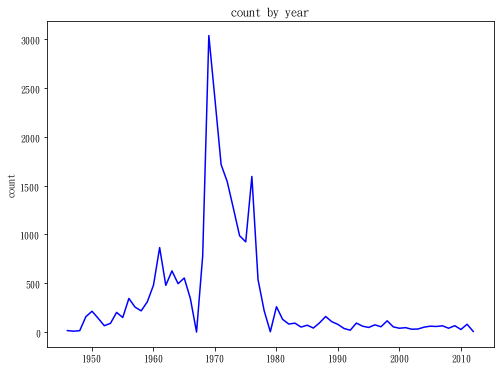

In [ ]:
plot_doc_select("count")

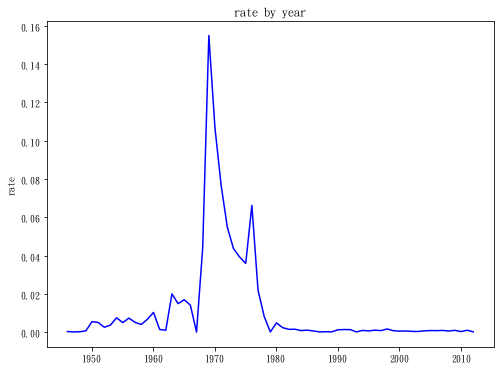

In [ ]:
plot_doc_select("rate")

In [ ]:
df=res[0]

In [ ]:
## 存檔
# save excel
pth="D:/my python/people/working/"     #先建一個 working 目錄
fname=pth+method+title+".xlsx"
writer = pd.ExcelWriter(fname)
df.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [ ]:
###################################################
import pandas as pd
print (method,",prar or sent")
pth="D:/my python/people/working/"    
fname=pth+method+title+".xlsx"
df=pd.read_excel(fname, 0)
df

para ,prar or sent


,Unnamed: 0,year,filename,title,para
0,0,1946,人民日報_19460709_2_2244,正向全军传达并拟写成小册子畅谈旅延印象甚佳民主建国军参观团返部,民主 建国 军 延安 参观团 一行 十余 人 ， 由 聂 副师长 志 超 率领 ， 已 于 ...
1,1,1946,人民日報_19460725_1_2322,遗嘱全党团结在毛泽东旗帜下奋斗前进关向应同志病逝延安中共中央宣布,中共中央 宣布 ： 中国共产党中央委员会 委员 中国共产党 最好 的 领导者 之一 第八路军...
2,2,1946,人民日報_19460726_1_2354,号召全党全军继承向应同志遗志奋斗到底朱总司令墓前悲痛致哀词关向应同志隆重落葬,中共中央 委员 关向应 同志 遗体 ， 于 昨日 下午 五时 在 中央党校 入殓 ， 今日 ...
3,3,1946,人民日報_19460801_1_1378,弼时同志报告死者生前事迹千余哀悼者默诵毛主席挽词延安追悼关向应同志,延安 各界 追悼 中共 中 委 关向应 同志 大会 ， 于 昨日 下午 四时 在 中央党校 ...
4,4,1946,人民日報_19461004_2_3813,目前应经过学习加强自卫思想准备中共西北局检查各机关党章学习,中共西北中央局常委会与边区级各机关首长会议 ， 在 两次 会议 上 ， 听取 宣传部长 李卓...
...,...,...,...,...,...
23346,23346,2012,人民日報_20120521_14_4894,纪念党的早期领导人罗亦农同志,中共中央党史研究室 罗亦农 同志 是 中国共产党 早期 重要 领导人 之一 ， 杰出 的 无...
23347,23347,2012,人民日報_20120420_23_8474,“我的朋友遍中国”,祝寿 臣 听到 罗高寿 先生 （ 见上图 ） 逝世 的 消息 ， 我 感到 十分 悲痛 。 ...
23348,23348,2012,人民日報_20120419_7_8535,《中国工运历史人物传略》(新书架),何虎生 、 覃艺 等 著 中国 工人 出版社 出版 该 丛书 共 11 册 ， 分别 为 《...
23349,23349,2012,人民日報_20120222_24_15056,倔老头,秦 锦屏 一 窗 灯火 不 熄 。 这 倔 老头儿 ， 点灯 熬夜 又 在 干 啥 ？ 我 ...


## 看看林彪

In [ ]:
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["林彪"]
title="林彪"
token=True
method="para"
res=doc_select(year, path, title, kw, token, method)

1946 done 23 5937 0.00047860829032795075
1947 done 25 10771 0.00027015344715798574
1948 done 35 8247 0.0005483486870965721
1949 done 102 18988 0.0004349976970710155
1950 done 31 19608 0.0007904936760505916
1951 done 14 13981 0.000500679493598455
1952 done 5 12915 0.00019357336430507162
1953 done 5 12195 0.0002050020500205002
1954 done 10 13463 0.00037138824927579294
1955 done 5 15057 0.00016603573088928738
1956 done 6 23531 0.00012749139433088267
1957 done 6 24947 0.00012025494047380447
1958 done 15 27320 0.0002745241581259151
1959 done 56 23198 0.0012070006035003018
1960 done 65 23361 0.0013912075681691708
1961 done 99 22638 0.0001612162545067271
1962 done 71 17846 0.0001490807387685511
1963 done 55 15708 0.0017507002801120449
1964 done 126 16644 0.0037851478010093725
1965 done 180 16371 0.005497526113249038
1966 done 533 12206 0.021833524496149434
1967 done 759 9132 0.04155716162943495
1968 done 413 8878 0.023259743185402117
1969 done 358 9802 0.01826157926953683
1970 done 267 11171 

In [ ]:
print_doc_select(5)

林彪
*************************
人民日報_19680507_1_376098
读 毛主席 的 书 ， 听 毛主席 的话 ， 照 毛主席 的 指示 办事 ， 做 毛主席 的 好 战士 。 我们 伟大领袖 毛主席 两年 前 发出 了 具有 伟大 历史 意义 和 战略意义 的 “ 五 · 七 ” 指示 ， 号召 我们 把 全国 全军 都 办成 革命 的 大 学校 。 这 是 我国 建设 社会主义 的 纲领性 指示 ， 是 我军 革命化 建设 的 指针 。 两年 来 ， 我军 广大 指战员 热烈响应 毛主席 关于 “ 人民解放军 应该 是 一个 大 学校 ” 的 伟大 号召 ， 适应 无产阶级 文化大革命 的 新 形势 ， 把 活学活用 毛主席 著作 的 群众运动 推向 了 新 阶段 。 全军 涌现出 许许多多 办成 毛泽东思想 大 学校 的 先进 单位 。 “ 学习 毛主席 著作 的 模范 红 九连 ” 就是 其中 最 突出 的 代表 。 红 九连 坚决执行 林彪 副 主席 关于 学习 毛泽东思想 的 一系列 重要 指示 ， 始终 站 在 全军 活学活用 毛主席 著作 群众运动 的 前列 ， 不断 地 创造 和 发展 活学活用 毛主席 著作 的 经验 。 红 九连 在 两个 阶级 、 两条道路 、 两条路线 斗争 的 大 课堂 里 ， 用 毛泽东思想 破私立公 ， 改造 世界观 ， 提高 路线斗争 的 觉悟 ， 培养 了 一批 又 一批 忠于 毛主席 的 无产阶级 革命 战士 。 他们 在 部队 是 执行 毛主席 建军 路线 的 优秀 骨干 ， 到 地方 是 传播 毛泽东思想 的 宣传员 。 红 九连 的 同志 在 无产阶级 文化大革命 中 经受 住 严峻 的 考验 ， 为 人民 立下 了 新功 。 正如 林彪 副 主席 早就 指出 的 ： “ 好 的 连队 就是 一个 学校 ， 九连 就是 一个 好 学校 。 ” 毛主席 教导 我们 ： “ 正确 的 政治 的 和 军事 的 路线 ， 不是 自然 地 平安地 产生 和 发展 起来 的 ， 而是 从 斗争 中 产生 和 发展 起来 的 。 ” 红 九连 这个 毛泽东思想 的 大 学校 ， 就是 在 两条路线 的 激烈 斗争 中 创办 和 发展 起来 的 。 红 九连 开展 活学活用 毛泽东思想 群

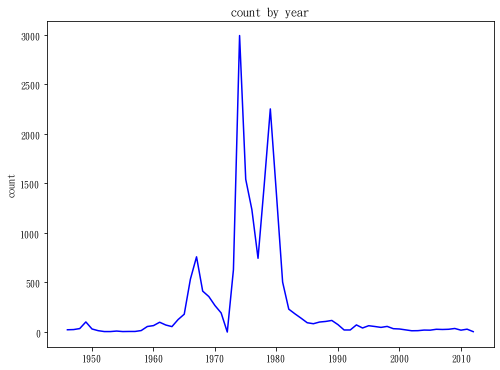

In [ ]:
plot_doc_select("count")

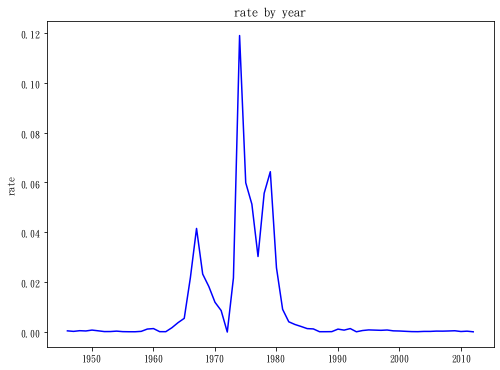

In [ ]:
plot_doc_select("rate")

In [ ]:
df=res[0]

In [ ]:
## 存檔
# save excel
pth="D:/my python/people/working/"     #先建一個 working 目錄
fname=pth+method+title+".xlsx"
writer = pd.ExcelWriter(fname)
df.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [ ]:
###################################################
import pandas as pd
print (method,",prar or sent")
pth="D:/my python/people/working/"    
fname=pth+method+title+".xlsx"
df=pd.read_excel(fname, 0)
df

para ,prar or sent


,Unnamed: 0,year,filename,title,para
0,0,1946,人民日報_19460515_3_1959,英勇的四平街保卫战,严重 紧张 的 第一天 打击 以后 ， 突然 — — 由 一个 连 传播 到 一个 营 ，...
1,1,1946,人民日報_19460516_1_650,前线指战员坚信：“四平街永远是我们的”！国民党军进退两难四平街我军阵地屹立如山,本社 记者 陈沂 报导 ： 四平 街 保卫战 已 接近 四个 星期 ， 由于 我 守城 部队...
2,2,1946,人民日報_19460519_2_2027,向四平街保卫者致敬十七师暨军区警卫团,十七 师 全体 指战员 ， 昨日 特 致电 东北民主联军 林彪 将军 暨 四平 街 的 英勇...
3,3,1946,人民日報_19460522_1_4321,林彪将军访问记,在 上月 间 一个 晴朗 的 早晨 ， 记者 在 一处 村庄 的 庭院 里 ， 会晤 了为...
4,4,1946,人民日報_19460522_1_4321,林彪将军访问记,林彪 将军 肯定 地 说 ： “ 我们 的 士气 很 高 ， 攻击 精神 很 旺 ， 能够...
...,...,...,...,...,...
18047,18047,2011,人民日報_20110105_6_41788,在纪念杨得志同志诞辰100周年座谈会上的讲话,郭伯雄 同志 们 ： 今天 ， 我们 在 这里 举行 座谈会 ， 纪念 中国共产党 的 优秀...
18048,18048,2012,人民日報_20120608_12_2588,任人唯贤 服务大局,张柏林 党 的 组织路线 用 一句 话 来 概括 ， 就是 党 的 组织 工作 必须 为 党...
18049,18049,2012,人民日報_20120425_24_7929,补照的标准像,万伯 翱 开国 大将 黄克诚 ， 是 一位 令人尊敬 的 老 共产党员 。 黄克诚 一生 戎...
18050,18050,2012,人民日報_20120410_20_9690,感悟辉煌,祁 季明 近现代史 上 ， 中国 经历 的 失败 与 成功 ， 苦难 与 辉煌 ， 究竟 能...


## 看看周恩来

In [ ]:
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["周恩来","恩來同志"]
title="周恩来"
token=True
method="para"
res=doc_select(year, path, title, kw, token, method)

1946 done 86 5937 0.0017895788247045115
1947 done 27 10771 0.0002917657229306246
1948 done 6 8247 9.400263207369807e-05
1949 done 247 18988 0.0010533767762405963
1950 done 453 19608 0.01155140758873929
1951 done 276 13981 0.009870538588083828
1952 done 340 12915 0.01316298877274487
1953 done 332 12195 0.013612136121361213
1954 done 804 13463 0.02985961524177375
1955 done 650 15057 0.02158464501560736
1956 done 1067 23531 0.0226722196251753
1957 done 1063 24947 0.02130516695394236
1958 done 615 27320 0.011255490483162519
1959 done 786 23198 0.01694111561341495
1960 done 974 23361 0.020846710329181114
1961 done 1649 22638 0.0026853091280968993
1962 done 1029 17846 0.002160620847786466
1963 done 829 15708 0.026387827858416094
1964 done 1111 16644 0.033375390531122325
1965 done 995 16371 0.03038910268157107
1966 done 477 12206 0.019539570702932985
1967 done 325 9132 0.01779456855015331
1968 done 195 8878 0.010982203198918676
1969 done 201 9802 0.010253009589879616
1970 done 486 11171 0.021

In [ ]:
print_doc_select(5)

周恩来
*************************
人民日報_19790526_1_516945
— — 记 二十二年 坚持 战斗 在 北大荒 的 六位 同志 《 中国青年报 》 编者按 ： 不久前 ， 本报 收到 东北 一位 读者来信 ， 他 豪情满怀 地 回忆起 五十年代 的 青年 响应 党 的 号召 ， 以 艰苦奋斗 为 荣 ， 争相 献身 祖国 边疆 建设 事业 的 动人 情景 。 信 中 提到 ， 一九五七年 四月 《 中国青年报 》 曾 发表 南京 农学院 三十四 位 同学 的 决心书 ， 有 七个 人 被 批准 去 黑龙江省 ， 现在 除 一位 因 工作 调离 外 ， 其他 六位 始终 坚持 战斗 在 北大荒 。 我们 根据 读者 提供 的 线索 ， 特 请 黑龙江省 国营农场 总局 的 同志 ， 寻访 这 六位 同志 ， 报道 他们 二十二年 走过 的 道路 。 从 吕士衡 等 六位 同志 事迹 中 ， 我们 看到 了 五十年代 富有 理想 、 勇于 奋斗 的 青年 们 的 缩影 ， 在 他们 身上 洋溢着 献身 祖国 、 为 社会主义 干 一番 事业 的 崇高精神 。 他们 在 选择 生活道路 的 时候 ， 不是 醉心于 个人 生活 的 安逸 舒适 ， 而是 热望 亲手 改变 祖国 的 贫穷落后 面貌 ； 不是 “ 管 他 对口 不 对口 ， 只要 守 在 家门口 ” ， 而是 心怀 天下 ， 目光远大 ， 渴求 把 知识 用到 人民 最 需要 的 地方 。 二十二个 春秋 过去 了 ， 他们 实践 着 自己 的 誓言 ， 毫不 后悔 ， 充满 了 自豪 ， 因为 他们 把 自己 最 美好 年华 的 汗水 和 智慧 ， 汇入 了 伟大 的 社会主义 建设 事业 中 ， 化成 了 金灿灿 的 粮食 ， 为 人民 做出 宝贵 贡献 。 他们 的 青春 是 壮美 的 ， 他们 走过 的 道路 是 令人钦佩 的 。 青年 同志 们 ， 当 你 此刻 阅读 这 篇 报道 的 时候 ， 当 你 即将 接受 毕业分配 或 填写 报考 志愿 的 时候 ， 当 你 思考 自己 在 边疆 或 农村 去留 问题 的 时候 ， 你 怎样 考虑 祖国 和 人民 的 需要 ， 选择 个人 的 生活道路 ？ 你 准备 怎样 发扬 前 一辈 青年 光荣 的 革命 传统 呢

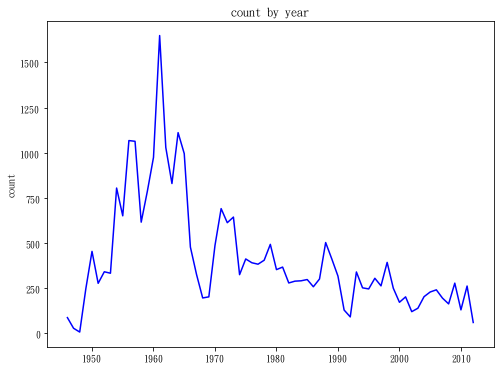

In [ ]:
plot_doc_select("count")

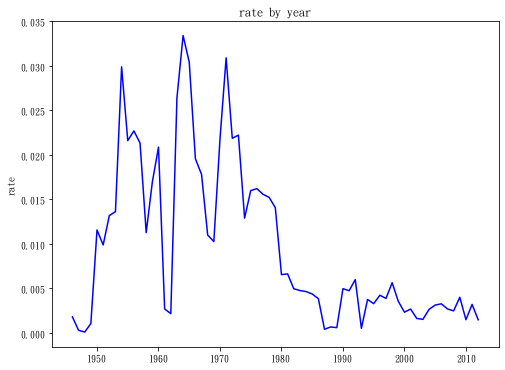

In [ ]:
plot_doc_select("rate")

In [ ]:
df=res[0]

In [ ]:
## 存檔
# save excel
pth="D:/my python/people/working/"     #先建一個 working 目錄
fname=pth+method+title+".xlsx"
writer = pd.ExcelWriter(fname)
df.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [ ]:
###################################################
import pandas as pd
print (method,",prar or sent")
pth="D:/my python/people/working/"    
fname=pth+method+title+".xlsx"
df=pd.read_excel(fname, 0)
df

para ,prar or sent


,Unnamed: 0,year,filename,title,para
0,0,1946,人民日報_19460515_1_4251,光山小组将视察中原解放区周徐白三氏飞南京,据 中央社 报导 ： 中共代表 周恩来 美方 代表 白鲁德 及 徐永昌 代表 王天鸣 等 一...
1,1,1946,人民日報_19460520_1_4284,新华社奉命驳斥西南日报新闻报造谣张学良参加中共,（ 迟到 ） 本月 五日 重庆 西南 日报 据 上海 新闻 报 三日 长途电话 称 ： 周恩...
2,2,1946,人民日報_19460525_2_2048,我要求驻员花园口，竟遭无理拖延。我驻京代表据理力争国方仍不顾中外复堤合理要求,晋冀鲁豫边区政府代表 赵明甫 王笑一 偕同 黄 委会 危 海宁 氏 （ 美 人 ， 社会科学...
3,3,1946,人民日報_19460526_1_4343,调查违犯停战令行动军调部颁发和字第七号命令,北平 军事 调处 执行部 于 十七日 颁发 和字 第七号 命令 ， 原文 如下 ： 南京 三...
4,4,1946,人民日報_19460603_1_1098,“堵口工程继续进行”一点我方提出保留意见马、周、薛再三考虑保证彻底执行南京谈判获得协议先浚河...,晋冀鲁豫 边府 驻 汴 黄 委会 代表团 赵明甫 ， 王笑一 二氏 ， 于 十七 十八两 日...
...,...,...,...,...,...
27664,27664,2012,人民日報_20120131_16_17750,携手共画“同心圆”,冯春梅 黄建东 叶远义 厦门港 国际 旅游 码头 航道 宽阔 ， 普通 油轮 进出港 游刃有...
27665,27665,2012,人民日報_20120129_4_17982,400万游客喜过津味文化年(春节黄金周 火了文化游),本报 天津 1 月 28 日电 （ 记者 陈杰 ） 据 天津市 统计局 今日 统计 结果显示...
27666,27666,2012,人民日報_20120117_1_18761,习近平出席尼克松总统访华和上海公报发表40周年纪念活动,新华社 北京 １ 月 １ ６ 日电 （ 记者 钱彤 ） 中国人民外交学会 、 中国人民对外友...
27667,27667,2012,人民日報_20120117_4_18791,习近平出席尼克松总统访华和上海公报发表40周年纪念活动,新华社 北京 １ 月 １ ６ 日电 （ 记者 钱彤 ） 中国人民外交学会 、 中国人民对外友...


## 看看毛泽东

In [ ]:
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["毛泽东","毛主席"]
title="毛泽东"
token=True
method="para"
res=doc_select(year, path, title, kw, token, method)

1946 done 468 5937 0.009738638255368736
1947 done 767 10771 0.008288307758807002
1948 done 565 8247 0.008851914520273235
1949 done 3633 18988 0.015493594445676464
1950 done 2584 19608 0.06589147286821706
1951 done 2811 13981 0.1005292897503755
1952 done 2399 12915 0.09287650019357337
1953 done 1694 12195 0.06945469454694547
1954 done 1418 13463 0.052662853747307434
1955 done 1187 15057 0.03941688251311682
1956 done 1368 23531 0.02906803790744125
1957 done 2038 24947 0.04084659478093558
1958 done 2169 27320 0.03969619326500732
1959 done 2170 23198 0.04677127338563669
1960 done 3135 23361 0.06709901117246693
1961 done 2760 22638 0.004494513762005725
1962 done 1908 17846 0.00400628238831543
1963 done 2940 16013 0.006278858187502937
1964 done 6747 17007 0.013362036527256812
1965 done 2984 16371 0.09113676623297294
1966 done 5720 12206 0.2343109945928232
1967 done 6299 9132 0.344886114761279
1968 done 5999 8878 0.3378576255913494
1969 done 6731 9802 0.34334829626606816
1970 done 6416 11171 

In [ ]:
print_doc_select(5)

毛泽东
*************************
人民日報_19760908_1_480118
— — 辽阳 石油 化学纤维 总厂 建设工程 的 调查 辽阳 石油 化学纤维 总厂 （ 简称 辽化 ） 是 我国 正在 兴建 的 一个 以 生产 合成纤维 和 塑料原料 为主 的 大型 石油 化学纤维 联合 企业 。 自从 中共 辽宁省委 发动 全省 人民 和 辽化 建设 大军 ， 造 了 “ 条条 专政 ” 的 反 ， 组织 全省 大会战 之后 ， 迅速 改变 了 冷冷清清 的 局面 ， 建设 进度 步步 加快 。 这 一 生动 的 事实 ， 再 一次 证明 毛主席 关于 “ 有 两个 积极性 ， 比 只有 一个 积极性 好得多 ” 的 指示 无比 英明 正确 。 目前 ， 在 批 邓 、 反击 右倾 翻案风 的 伟大 斗争 推动 下 ， 辽阳 石油 化学纤维 总厂 工程 正 以 前所未有 的 速度 和 水平 ， 昂首阔步 ， 高歌猛进 。 广大 建设 大军 坚持 大学 大批 促 大干 ， 誓 与 邓小平 对着干 ！ 纵横 数十里 的 工地 上 ， 建筑 成群 ， 塔 罐 林立 ， 烟囱 入云 ， 管排 密布 。 今年 上半年 完成 的 建筑安装 工作量 ， 等于 去年同期 的 四点 二倍 ， 七 、 八月份 在 高温多雨 的 困难 情况 下 ， 仍然 超额完成 了 国家 建设 计划 。 搞 “ 条条 专政 ” 冷冷清清 ， 实行 党 的 一元化 领导 热气腾腾 在 辽化 建设 过程 中 ， 充满 了 两条路线 的 激烈 斗争 。 从 一九七四年 八月 辽化 工程 破土动工 到 一九七五年 六月 的 十一个月 里 ， 由于 邓小平 推行 反革命 的 修正主义 路线 ， 重 搞 “ 条条 专政 ” ， 不 依靠 地方党委 ， 工地 上党 的 一元化 领导 长期 没有 形成 ， 压抑 了 地方 和 广大群众 的 积极性 ， 整个 工地 出现 死气沉沉 、 冷冷清清 的 局面 ， 月 月 完 不成 施工 计划 。 然而 ， 邓小平 却 别有用心 地 对 广大 辽化 建设者 反咬一口 ， 叫嚷 什么 ： “ 这个 项目 放在 辽宁 是 个 错误 ， 辽宁 搞不好 ， 赶快 下决心 拿走 ” 。 邓小平 的 倒行逆施 激起 了 辽宁 人民 的 极大 愤慨 。 去年 七月

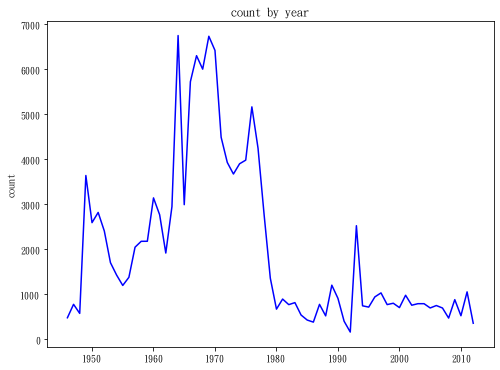

In [ ]:
plot_doc_select("count")

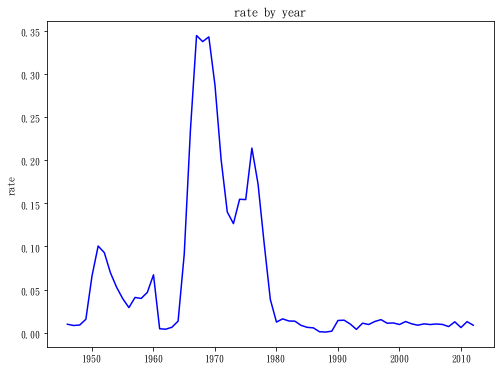

In [ ]:
plot_doc_select("rate")

In [ ]:
df=res[0]

In [ ]:
## 存檔
# save excel
pth="D:/my python/people/working/"     #先建一個 working 目錄
fname=pth+method+title+".xlsx"
writer = pd.ExcelWriter(fname)
df.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [ ]:
###################################################
import pandas as pd
print (method,",prar or sent")
pth="D:/my python/people/working/"    
fname=pth+method+title+".xlsx"
df=pd.read_excel(fname, 0)
df

para ,prar or sent


,Unnamed: 0,year,filename,title,para
0,0,1946,人民日報_19460515_1_4256,发刊词,本报 — — 人民日报 ， 晋冀鲁豫 边区 广大 人民 的 报纸 ， 在 大家 热烈 期待...
1,1,1946,人民日報_19460515_4_645,毛主席的像片,“ 哼 ！ 我 知道 。 ” 杨小玉 得意 的 抿着嘴 ， 一面 拨弄 着 一本 教科书 ...
2,2,1946,人民日報_19460515_4_645,毛主席的像片,又 一天 ， 杨小玉 正 提起 书包 准备 上学 去 ， 忽然 在 他 父亲 的 书架 背...
3,3,1946,人民日報_19460515_4_645,毛主席的像片,课室 里 还 没 一个 人 ， 静悄悄 的 。 小玉 坐下 来 ， 把 画报 掏出 来 ，...
4,4,1946,人民日報_19460515_4_645,毛主席的像片,渐渐 地 ， 小 同学 来 多 了 ， 大家 都 围上来 ， 四五 双 圆滚滚 的 眼睛 ...
...,...,...,...,...,...
135457,135457,2012,人民日報_20120111_7_19567,充分发挥马克思主义研究的“助推器”作用（信息快递）,本报记者 杨 学博 “ 中国 马克思主义 研究 基金会 换届 大会 暨 三届 一次 理事 会...
135458,135458,2012,人民日報_20120111_24_19671,以女儿的名义,书法 ： 毕胜 贺捷生 苍山 如海 。 站 在 他 早年 生活 的 院落 ， 我 仰起 头 ...
135459,135459,2012,人民日報_20120109_7_19887,努力践行党的根本宗旨,吉林省 中国特色社会主义 理论体系 研究 中心 我们 党 除了 人民 的 利益 没有 自己 ...
135460,135460,2012,人民日報_20120109_24_19976,水文行迹,杨闻宇 常人 眼里 ， 一滴 是 水 的 最小 单位 。 其 最佳 形象 是 朝霞 里 缀 ...


### 毛的引文

In [ ]:
import re
title="引文"
# \w? 表示可有可無的字元
pattern=['毛主席告诫\w?\w?：|毛泽东同志告诫\w?\w?：',
         '毛主席\w?\w?\w?批示：|毛泽东同志\w?\w?\w?批示：',
         '毛主席\w?\w?\w?指出：|毛泽东同志\w?\w?\w?指出：',
         '毛主席\w?\w?\w?语录：|毛泽东同志\w?\w?\w?语录：',
         '毛主席\w?\w?\w?说：|毛泽东同志\w?\w?\w?说：',
         '毛主席\w?\w?\w?教导：|毛泽东同志\w?\w?\w?教导：',
         '毛主席\w?\w?\w?告诉\w?\w?：|毛泽东同志\w?\w?\w?告诉\w?\w?：'
         '毛主席对\w?\w?\w?说：|毛泽东同志对\w?\w?\w?说：']
cite=[]
filename=[]
who=[]
for n in range(len(df)):
    st=df.para[n]
    st=st.replace(" ","") # 取消斷詞
    # 去除毛為受詞者
    st=st.replace('对毛主席',"对毛--")
    st=st.replace('告诉毛主席',"告诉毛--")
    d=df.filename[n]
    con=True
    for pa in range(len(pattern)):
        p=0
        string="re.compile(r'"+pattern[pa]+"')"
        patt=eval(string)
        result=patt.findall(st)
        if len(result)>0:
            for r in range(len(result)):
                f=re.search(result[r], st[p:])
                start=f.start()
                end=f.end()
                length=end-start
                # 尋找字串，從第幾個位置找起，第幾個位置結束
                p1=st[p:].find('“',start)  
                p2=st[p:].find('”',p1+1,len(st[p:]))  
                
                if len(st)>p+end:
                    # 如果沒有引號
                    if st[p+end:][0]!='“':
                        p1=end
                        p2=st[p:].find('。',p1+1,len(st[p:])) 
                        who.append(result[r])
                        cite.append(st[p+p1:p+p2+1])
                        filename.append(d)
                        p=end   
                    # 如有引號
                    else:
                        who.append(result[r])
                        cite.append(st[p+p1:p+p2+1])
                        filename.append(d)
                        p=end                     
    if n%10000==0:
        print (n,"/",len(df),"done",len(who),len(cite),len(filename))

0 / 135462 done 0 0 0
10000 / 135462 done 327 327 327
20000 / 135462 done 691 691 691
30000 / 135462 done 1494 1494 1494
40000 / 135462 done 1939 1939 1939
50000 / 135462 done 3553 3553 3553
60000 / 135462 done 7311 7311 7311
70000 / 135462 done 10532 10532 10532
80000 / 135462 done 13704 13704 13704
90000 / 135462 done 15373 15373 15373
100000 / 135462 done 17366 17366 17366
110000 / 135462 done 18726 18726 18726
120000 / 135462 done 19119 19119 19119
130000 / 135462 done 19392 19392 19392


In [ ]:
len(who)

19544

In [ ]:
data=list(zip(filename,who,cite))
df3=pd.DataFrame(data,columns=["filename","who","cite"])
df3

,filename,who,cite
0,人民日報_19460709_2_2244,毛主席曾说：,“高总司令领导大家在邯郸起义，是中国历史上一件大事情。”
1,人民日報_19460831_2_3230,毛主席说：,“今天是我们石木村群众从千斤石板下翻身的纪念日。我们回想着过去在国民党反动派的血腥统治下，尝...
2,人民日報_19460916_1_3781,毛主席指出：,“帝国主义侵略中国，反对中国独立，反对中国发展资本主义的历史，就是中国的近代史，历来中国革命...
3,人民日報_19460916_1_5055,毛主席对他说：,“张老先生，你像吴满有一样的翻身了，不过你们两人经过了两条不同的道路。”
4,人民日報_19461025_3_5436,毛主席说：,“我翻了身，要是没营生，就对不起咱毛主席。”
...,...,...,...
19539,人民日報_20120626_7_675,毛泽东同志豪迈地说：,“中国的命运一经操在人民自己的手里，中国就将如太阳升起在东方那样，以自己的辉煌的光焰普照大地...
19540,人民日報_20120615_7_1677,毛泽东同志深刻指出：,做调查“没有满腔的热忱，没有眼睛向下的决心，没有求知的渴望，没有放下臭架子、甘当小学生的精神...
19541,人民日報_20120524_16_4475,毛泽东同志说：,我们应当认真学习群众的语言。
19542,人民日報_20120517_8_5316,毛泽东同志指出：,“为什么人的问题，是一个根本的问题、原则的问题。”


In [ ]:
d=df3.sample(20)
d

,filename,who,cite
6749,人民日報_19680223_1_374180,毛主席的教导：,“人民得到的权利，绝不允许轻易丧失，必须用战斗来保卫。”
1060,人民日報_19600321_7_241607,毛主席说：,“中国只有在社会经济制度方面彻底地完成社会主义改造，又在技术方面，在一切能够使用机器操作的部...
18798,人民日報_19810328_8_562895,毛主席说：,“明天开个追悼会，我们都去参加……”
11255,人民日報_19700311_4_394818,毛主席说：,“我们看事情必须要看它的实质，而把它的现象只看作入门的向导，一进了门就要抓住它的实质，这才是...
16812,人民日報_19760312_3_473851,毛主席指出：,“百花齐放、百家争鸣这两个口号，就字面看，是没有阶级性的，无产阶级可以利用它们，资产阶级也可...
9292,人民日報_19690511_3_385985,毛主席教导说：,“我们的方针要放在什么基点上？放在自己力量的基点上，叫做自力更生。”
5594,人民日報_19670728_6_368995,毛主席说：,“全世界各国人民的正义斗争，都是互相支持的。”
3636,人民日報_19661025_1_361424,毛主席说：,“我们要和一切资本主义国家的无产阶级联合起来，……解放我们的民族和人民，解放世界的民族和人民。”
4733,人民日報_19670327_2_365832,毛主席说：,“世界上一切革命斗争都是为着夺取政权，巩固政权。而反革命的拚死同革命势力斗争，也完全是为着维...
8997,人民日報_19690305_6_384161,毛主席指出：,“帝国主义给自己准备了灭亡的条件。殖民地半殖民地的人民大众和帝国主义自己国家内的人民大众的觉...


In [ ]:
d=df3.sample(20)
ci=list(d.cite)
wh=list(d.who)
fi=list(d.filename)

for n in range(len(d)):
    print ("---------------")
    print (fi[n])
    print (wh[n],ci[n])
    

---------------
人民日報_19690223_1_383847
毛主席的教导： “工业无产阶级是我们革命的领导力量”
---------------
人民日報_19681006_4_379998
毛主席的教导： “必须坚持干部参加集体生产劳动的制度。我们党和国家的干部是普通劳动者，而不是骑在人民头上的老爷。干部通过参加集体生产劳动，同劳动人民保持最广泛的、经常的、密切的联系。这是社会主义制度下一件带根本性的大事，它有助于克服官僚主义，防止修正主义和教条主义”
---------------
人民日報_19680831_2_379123
毛主席的教导： “成千成万的先烈，为着人民的利益，在我们的前头英勇地牺牲了，让我们高举起他们的旗帜，踏着他们的血迹前进吧！”
---------------
人民日報_19701005_3_400798
毛主席说： “我们这个队伍完全是为着解放人民的，是彻底地为人民的利益工作的。”
---------------
人民日報_19700414_6_395891
毛主席指出： “凡属倒退行为，结果都和主持者的原来的愿望相反。”
---------------
人民日報_19580619_4_198040
毛主席指出： “无论在全人口中间，或者在知识分子中间，马克思主义者仍然是少数”
---------------
人民日報_19890109_8_818173
毛主席对塞克说： “留在我们这里工作吧，我们的池子小，还是敢养大鱼的哟！”
---------------
人民日報_19671116_6_371797
毛泽东同志这样的教导： “帝国主义时代的阶级斗争的经验告诉我们：工人阶级和劳动群众，只有用枪杆子的力量才能战胜武装的资产阶级和地主；在这个意义上，我们可以说，整个世界只有用枪杆子才可能改造。”
---------------
人民日報_19720423_2_419217
毛主席的教导： “我们许多同志缺乏分析的头脑，对于复杂事物，不愿作反复深入的分析研究，而爱作绝对肯定或绝对否定的简单结论。……今后应该改善这种状况。”
---------------
人民日報_19691006_6_389957
毛主席的教导： ‘七亿中国人民是越南人民的坚强后盾，辽阔的中国领土是越南人民的可靠后方。
---------------
人

### 存檔與讀檔

In [ ]:
## 存檔
# save excel
pth="D:/my python/people/working/"     #先建一個 working 目錄
fname=pth+"cite"+title+".xlsx"
writer = pd.ExcelWriter(fname)
df3.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [ ]:
###################################################
import pandas as pd
pth="D:/my python/people/working/"    
fname=pth+"cite"+title+".xlsx"
df3=pd.read_excel(fname, 0)
df3

,Unnamed: 0,filename,who,cite
0,0,人民日報_19460709_2_2244,毛主席曾说：,“高总司令领导大家在邯郸起义，是中国历史上一件大事情。”
1,1,人民日報_19460831_2_3230,毛主席说：,“今天是我们石木村群众从千斤石板下翻身的纪念日。我们回想着过去在国民党反动派的血腥统治下，尝...
2,2,人民日報_19460916_1_3781,毛主席指出：,“帝国主义侵略中国，反对中国独立，反对中国发展资本主义的历史，就是中国的近代史，历来中国革命...
3,3,人民日報_19460916_1_5055,毛主席对他说：,“张老先生，你像吴满有一样的翻身了，不过你们两人经过了两条不同的道路。”
4,4,人民日報_19461025_3_5436,毛主席说：,“我翻了身，要是没营生，就对不起咱毛主席。”
...,...,...,...,...
19539,19539,人民日報_20120626_7_675,毛泽东同志豪迈地说：,“中国的命运一经操在人民自己的手里，中国就将如太阳升起在东方那样，以自己的辉煌的光焰普照大地...
19540,19540,人民日報_20120615_7_1677,毛泽东同志深刻指出：,做调查“没有满腔的热忱，没有眼睛向下的决心，没有求知的渴望，没有放下臭架子、甘当小学生的精神...
19541,19541,人民日報_20120524_16_4475,毛泽东同志说：,我们应当认真学习群众的语言。
19542,19542,人民日報_20120517_8_5316,毛泽东同志指出：,“为什么人的问题，是一个根本的问题、原则的问题。”


# 加入 people 模組 （待補）